# Project 8: Image Processing 

As a reminder, projects are designed to be completed individually. You may discuss the project with others, and you may help one another complete the project, but all help should follow the principle of **"understanding, not answers."** In particular, you may not copy code from any source. (See the collaboration rules in the "Programming projects" section of the syllabus.)

## Introduction

In this program, you will be using Python to load, edit, and write image files. Specifically, we will be applying _filters_ to images by modifying their pixel values.

For example, your final program will take a picture of the BCLC and produce the following filtered images:

<table>
    <tr>
        <td><img src="https://storage.googleapis.com/141-files/bclc_negate_red.jpg" width=200/><br>negate red
        <td><img src="https://storage.googleapis.com/141-files/bclc_negate_green.jpg" width=200/><br>negate green
        <td><img src="https://storage.googleapis.com/141-files/bclc_negate_blue.jpg" width=200/><br>negate blue
    </tr>
    <tr>
        <td><img src="https://storage.googleapis.com/141-files/bclc_remove_red.jpg" width=200/><br>remove red
        <td><img src="https://storage.googleapis.com/141-files/bclc_remove_green.jpg" width=200/><br>remove green
        <td><img src="https://storage.googleapis.com/141-files/bclc_remove_blue.jpg" width=200/><br>remove blue
    </tr>
    <tr>
        <td><img src="https://storage.googleapis.com/141-files/bclc_negate_all.jpg" width=200/><br>negate all
        <td><img src="https://storage.googleapis.com/141-files/bclc_flip_horizontally.jpg" width=200/><br>flip horizontally
        <td><img src="https://storage.googleapis.com/141-files/bclc_grayscale.jpg" width=200/><br>grayscale
    </tr>
</table>

In order to facilitate **incremental development**, this project is broken into five parts:

- **Part 1.** Modifying pixels.
- **Part 2.** Modifying images.
- **Part 3.** Reading PPM files
- **Part 4.** Writing PPM files.
- **Part 5.** The `main` function. (This part includes an example interaction for your final program.)

You will write your code in the file `imgfilter.py`.

You are also given a file `utils.py` with some helpful functions for testing--do not edit this file! (If you do edit this file and need to get the original version back, then delete just the file `utils.py` and restart your server.)

This notebook begins with four sections explaining some basic concepts you'll need to understand to complete the project. You are encouraged to discuss these four sections ("Tuples", "Pixels", "Images", "The PPM format") with classmates in as much detail as you'd like.

## Tuples

On this project, we'll be working with a new type: `tuple`.

- A `tuple` represents a sequence of values of any type.
  - For example, $(2, 10)$ is a tuple. For another example, $(\text{"Matt"}, 2, \text{False})$ is a tuple.
- A `tuple` can be constructed in a few ways; the standard way is by separating several expressions by commas, within parentheses: `(a, b, c)`.
  - The parentheses are optional; you can also write `a, b, c`, unless you need the parentheses to control order of operations.
- A `tuple` is a *sequence type*. This means that it supports all [sequence operations](https://docs.python.org/3/library/stdtypes.html#common-sequence-operations), like indexing, slicing, concatenation, for-loops, etc.
- A `tuple` is *immutable*. This means that you can't change a tuple after it has been constructed.

You can think of a `tuple` as being just like a `list`, with two differences:
- A `tuple` is immutable, whereas a `list` is mutable.
- A `tuple` is constructed using parentheses, whereas a `list` is constructed using brackets.

Here's the [official Python documentation](https://docs.python.org/3/library/stdtypes.html#tuples) on tuples, if you want to read more.

For example, one common use of a `tuple` is to represent a point in 2d or 3d:

In [ ]:
# construct a tuple with two elements:
point = (2, 10)

# get the first element of the tuple:
x = point[0]
print(x)

# get the second element of the tuple:
y = point[1]
print(y)

# construct a tuple with three elements:
point3d = (3, 9, -1)

# print the last two elements of the tuple:
print(point3d[-2:])

To get more comfortable working with tuples, try writing some code with tuples in the block below!

- Can you create an empty tuple?
- Can you create a tuple with other numbers of elements?
- Can you print a tuple?
- Can you use concatenation (`+`) with tuples?
- Can you apply the `len` function to a tuple?
- Can you write a for-loop that iterates through the elements of a tuple?
- Can you change an element of a tuple? (Answer: no, since tuples are *immutable*, but try it out!)

In [ ]:
# You're encouraged (though not required) to write some code with tuples here:

## Pixels

A **pixel**, short for "picture element," represents a single point of color on a screen, or in an image. As we learned when working with graphics, one common way to represent a pixel is using red, green, and blue values (RGB, for short), using an `int` between 0 and 255 for each color. We can represent such a pixel as a tuple with three elements; for example:

- (255, 0, 0) represents a red value of 255, a green value of 0, and a blue value of 0. (This is the color red.)
- (0, 255, 255) represents a red value of 0, a green value of 255, and a blue value of 255. (This is the color cyan.)
- (127, 127, 127) represents a red value of 127, a green value of 127, and a blue value of 127. (This is the color gray.)

To test pixels in this notebook, you are given a function `display_pixel`. Here's the function comment:

```
# Display a single pixel in a canvas of the given size.
# pixel - The pixel to display, as a tuple with three elements.
# size - The height and width of the canvas to use.
# Returns None (NoneType).
def display_pixel(pixel, size):
    ...
```

This function is defined for you in the file `utils.py`. (Don't modify this file!) To call this function from this notebook, put the import statement `from utils import *` at the top of a code block, and then call the `display_pixel` function as indicated by the function comment above. Below we call the `display_pixel` function three times to display three different pixels.

Try constructing a pixel representing the color yellow in the block below!

In [ ]:
from utils import *

red = (255, 0, 0)
display_pixel(red, 100)

cyan = (0, 255, 255)
display_pixel(cyan, 100)

gray = (127, 127, 127)
display_pixel(gray, 100)

# You're encouraged (though not required) to construct a pixel representing the color yellow here:

## Images

Within our program, we'll represent images as **2-dimensional lists** of pixels, in other words, a list of lists of pixels.

As a reminder of how 2-dimensional lists work:

- We think of a single row of pixels in our image as a list of pixels.
- We think of the entire image as a list of rows. (That is, a list of lists of pixels.)

To test images in this notebook, you are given a function `display_image`. Here's the function comment:

```
# Display an image using pixels of the given size.
# image - The pixels to display, as a 2d array of tuples.
# size - The height and width of each pixel.
# Returns None (NoneType).
def display_image(image, size):
    ...
```

This function is defined for you in the file `utils.py`. (Don't modify this file!) To call this function from this notebook, put the import statement `from utils import *` at the top of a code block, and then call the `display_image` function as indicated by the function comment above.

For example, here's code that constructs a 2-by-2 image and displays it:

In [ ]:
from utils import *

image = [
    [(255, 0, 0), (0, 255, 0)],
    [(0, 0, 255), (255, 0, 0)]
]

display_image(image, 100)

You're encouraged (though not required) to try playing around with the code block above to get a sense for how images are represented:

- Can you change one of the pixels to another color?
- Can you change the size of the pixels in the displayed image?
- Can you add another column of pixels?

Here are some examples of code that manipulates an image:

In [ ]:
from utils import *

image = [
    [(255, 0, 0), (0, 255, 0)],
    [(0, 0, 255), (255, 0, 0)]
]

display_image(image, 100)

# Set the pixel at indices (0, 1) to black:
image[0][1] = (0, 0, 0)
display_image(image, 100)

# Set all pixels to dark gray:
for i in range(len(image)):
    for j in range(len(image[0])):
        image[i][j] = (63, 63, 63)
display_image(image, 100)

## The PPM format

Above we represented an image using a Python type. What if we wanted to store an image persistently on our system? To do this, we have to use an image format (e.g. `.jpg`, `.png`, `.svg`). For this project, we'll be working with an image format called [PPM](http://netpbm.sourceforge.net/doc/ppm.html).

In the PPM image format, we store the RGB-values for each pixel as numbers in a text file. Several PPM images are given to you in the `images/` folder; you're encouraged to open a few of them to see what they look like. Here are two examples:

`simple.ppm`:

```
P3
2 2
255
255 0 0 0 255 0
0 0 255 255 0 0
```

`simple2.ppm`:

```
P3
4 4
255
255 0 0 0 255 0 0 0 255 255 255 255
0 0 0 255 0 0 0 255 0 0 0 255
255 0 255 0 0 0 255 0 0 0 255 0
0 255 255 255 0 255 0 0 0 255 0 0
```

A PPM file is divided into two parts:

* A __header__ that describes the image size and how color values are represented.
* A __body__ that encodes the RGB values for each pixel in the image.

A PPM file can also contain commented lines; like Python, these are lines starting with `#`.

### The PPM header

The PPM header is the first three uncommented lines in the file. For example:

```
P3
2 2
255
```

* The first line (`P3`) specifies the file encoding--which _type_ of PPM image it is. We will always use `P3`.
* The second line specifies the width (columns) and then height (rows) of the image. The line `2 2` means our image has 2 columns & 2 rows.
* The last line indicates the maximum value for red, blue, and green values. We will always use 255.

### The PPM body

Below the header is the body. In the body, the RGB-values for each pixel are listed. For example:

```
255 0   0       0   255 0      0   0   255    255 255 255
0   0   0       255 0   0      0   255 0      0   0   255
255 0   255     0   0   0      255 0   0      0   255 0
0   255 255     255 0   255    0   0   0      255 0   0
```

Each line in the file represents one row in the image. On a line, each pixel is represented by three values between 0 and 255, separated by whitespace. So, the first pixel on row one in this image has the RGB values $(255, 0, 0)$. The second pixel has RGB values $(0, 255, 0)$.

An enlarged version of this image would look like this:

<img src="https://storage.googleapis.com/141-files/fourbyfour.png" width=200/>

### Displaying a PPM image

To display PPM images, you are given a function `display_ppm`. It takes a single string representing a path to a PPM file. To call this function, put the import statement `from cs1.ppm import *` at the top of a code block, and then call the `display_ppm` function. For example:

In [ ]:
from cs1.ppm import *

# Display the 2-by-2 image `simple.ppm`. (Note: This is a very small image!)
display_ppm('images/simple.ppm')

# Display the image `joly.ppm`, a picture of Dr. Superdock's dog.
display_ppm('images/joly.ppm')

### PPM images for testing

Several PPM images are given to you in the `images/` folder: `lynx.ppm`, `rhodes.ppm`, `bclc.ppm`, `blobby.ppm`, `tommy.ppm`, `hounddogs.ppm`, and `joly.ppm`. The first 3 images are related the Rhodes, the last 5 images are some of the CS professors' pets.

__Note:__ PPM is an inefficient format to begin with--images stored as PPM are orders of magnitude larger than images stored as JPG, for example--and our code for displaying them in a notebook is also currently inefficient, so displaying them is slow.

In [ ]:
from cs1.ppm import *

# uncomment/comment the following to see other test images!

#display_ppm('images/rhodes.ppm')    # ~3s
#display_ppm('images/bclc.ppm')      # ~10s
#display_ppm('images/blobby.ppm')    # ~1s - this is Dr. Kirlin's snowman, Blobby McPastaface
#display_ppm("images/tommy.ppm")     # ~4s - this is Dr. Welsh's pit bull Tommy
#display_ppm("images/tilly.ppm")     # ~2s - this is Dr. Sanders's dachshund Tilly

## Part 0: Write a header comment.

Open `imgfilter.py` and write the usual header comment. (See the Style Guide on Canvas.)

## Part 1: Modifying pixels.

First, we will write functions that each take a pixel as input, and return a modified pixel as output.

See the "Tuples" and "Pixels" sections above for background on how we represent pixels.

Specifically, you will write 8 functions:

- `pixel_negate_red`
- `pixel_negate_green`
- `pixel_negate_blue`
- `pixel_negate_all`
- `pixel_remove_red`
- `pixel_remove_green`
- `pixel_remove_blue`
- `pixel_grayscale`

The signatures and function comments for these functions are given to you in `imgfilter.py`.

Here are a few specific examples:

- `pixel_negate_green((100, 120, 140))` should return the pixel $(100, 135, 140)$.
  - We have replaced the green value $120$ by $255 - 120 = 135$.
- `pixel_remove_blue((100, 120, 140))` should return the pixel $(100, 120, 0)$.
  - We have replaced the blue value $140$ with $0$.
- `pixel_grayscale((100, 120, 140))` should return the pixel $(120, 120, 120)$.
  - We have replaced all three values with their average, $(100 + 120 + 140) / 3$, rounded down to the nearest integer.
  
Here's a code block you can use to test your functions manually. (Try modifying the colors & functions in the last two lines.)

In [ ]:
from cs1.notebooks import *
from utils import *
reload_functions('imgfilter.py')

red = (255, 0, 0)
green = (0, 255, 0)
blue = (0, 0, 255)
yellow = (255, 255, 0)
magenta = (255, 0, 255)
cyan = (0, 255, 255)
white = (255, 255, 255)
gray = (127, 127, 127)

display_pixel(yellow, 100)
display_pixel(pixel_negate_red(yellow), 100)

Run the following code block to run automatic tests for your functions:

In [ ]:
from cs1.notebooks import *
reload_functions('imgfilter.py')
ok_runtests('project-8.ok', 'q1')

## Part 2: Modifying images.

Next, we will write functions that each take an image as input, and modify that image in-place. Each function should return `None`.

See the "Images" section above for background on how we represent images.

Specifically, you will write 10 functions:

- `image_negate_red`
- `image_negate_green`
- `image_negate_blue`
- `image_negate_all`
- `image_remove_red`
- `image_remove_green`
- `image_remove_blue`
- `image_grayscale`
- `image_flip_horizontal`
- `image_flip_vertical`

The signatures and function comments for these functions are given to you in `imgfilter.py`. These should make clear what the functions should do.

**Notes:**
- Each of these functions should modify the image **in-place**.
- For some of these functions, you can use your pixel functions. (For example, call `pixel_negate_red` within `image_negate_red`.)

Here's a code block you can use to test your functions manually. (Try modifying the colors & functions.)

In [ ]:
from cs1.notebooks import *
from utils import *
reload_functions('imgfilter.py')

red = (255, 0, 0)
green = (0, 255, 0)
blue = (0, 0, 255)
yellow = (255, 255, 0)
magenta = (255, 0, 255)
cyan = (0, 255, 255)
white = (255, 255, 255)
gray = (127, 127, 127)

image = [
    [red, yellow],
    [magenta, white]
]

display_image(image, 100)
image_negate_red(image)
display_image(image, 100)

Run the following code block to run automatic tests for your functions:

In [ ]:
from cs1.notebooks import *
reload_functions('imgfilter.py')
ok_runtests('project-8.ok', 'q2')

## Part 3: Reading PPM files.

Next, we will write a function `read_ppm()`. This function takes a path to a PPM file as an argument, and reads that PPM file, storing the result as an image (that is, a 2d list of pixels). The function should return that image. The signature and function comment are given to you in `imgfilter.py`.

Here are some ideas that may help as you work on writing this function:

- You'll want to skip the header of the file. You can do this by calling the `f.readline()` function several times.
- Create an empty image before you start reading the body of the file, and add rows to that image one by one.
- Create an empty row before you start reading each line of the file, and add pixels to that row one by one.
- You'll need to convert the numbers in the file from strings to integers at some point.
- Don't forget to close the file.

Here's a code block you can use to test your `read_ppm()` function manually. (Also test using `simple2.ppm` instead of `simple.ppm`.)

In [ ]:
from cs1.notebooks import *
from utils import *
reload_functions('imgfilter.py')

image = read_ppm('images/simple2.ppm')
display_image(image, 100)

Run the following code block to run an automatic test for your `read_ppm()` function:

In [ ]:
from cs1.notebooks import *
reload_functions('imgfilter.py')
ok_runtests('project-8.ok', 'q3')

## Part 4: Writing PPM files.

Next, we will write a function `write_ppm()`. This function takes a path and an image as arguments, and writes the image to a PPM file at that path. The function should return `None`. The signature and function comment are given to you in `imgfilter.py`.

Here are some ideas that may help as you work on writing this function:

- Handle the first three lines of the PPM format first, then handle the body.
  - The first line should always be just "P3"; you can accomplish this with `f.write('P3\n')`. Similarly, the third line should always be just "255".
- Remember that you have to manually write the newline character `\n` whenever you want to move to the next line of the file.
- To write the body of the PPM file, use a nested loop.
- Don't forget to close the file.

Here's a code block you can use to test your `write_ppm()` function manually. This creates a file `test.ppm` in the current directory. After running this block, open that file; its contents should match the contents of `images/simple.ppm`.

In [ ]:
from cs1.notebooks import *
from utils import *
reload_functions('imgfilter.py')

image = [
    [(255, 0, 0), (0, 255, 0)],
    [(0, 0, 255), (255, 0, 0)]
]

write_ppm('test.ppm', image)

print('Finished calling `write_ppm()`.')

## Part 5: The `main()` function.

Finally, let's put it all together by writing a `main()` function. Your final program will do the following, in order:

- Prompt the user to input a path to a PPM file.
- Prompt the user to choose a filter from a list of choices.
- Read the PPM file from that path.
- Apply the chosen filter to that PPM file.
- Write the image to a new PPM file `out.ppm` (in the current directory).
- Display the written PPM file using the `display_ppm` function; this is done for you.

Below is an example interaction (user input shown in **bold**).

**Note:** When you run your program, you should expect that the output image will be left-aligned, not center-aligned as below.

<pre>
PPM file: <b>images/joly.ppm</b>

Select a filter:
1. Negate red
2. Negate green
3. Negate blue
4. Negate all
5. Remove red
6. Remove green
7. Remove blue
8. Grayscale
9. Flip horizontally
10. Flip vertically
Filter: <b>1</b>

Reading image...
Filtering image...
Writing filtered image...
Displaying filtered image...
</pre>
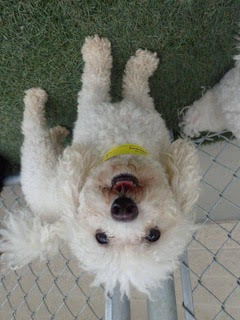

## Testing your program

Run the code block below to test your program.

In [ ]:
%run imgfilter.py

Test your program using the example interaction above.

Also, test each filter using the `images/bclc.ppm` image; your filtered pictures should look like these:

<table>
    <tr>
        <td><img src="https://storage.googleapis.com/141-files/bclc_negate_red.jpg" width=200/><br>negate red
        <td><img src="https://storage.googleapis.com/141-files/bclc_negate_green.jpg" width=200/><br>negate green
        <td><img src="https://storage.googleapis.com/141-files/bclc_negate_blue.jpg" width=200/><br>negate blue
    </tr>
    <tr>
        <td><img src="https://storage.googleapis.com/141-files/bclc_remove_red.jpg" width=200/><br>remove red
        <td><img src="https://storage.googleapis.com/141-files/bclc_remove_green.jpg" width=200/><br>remove green
        <td><img src="https://storage.googleapis.com/141-files/bclc_remove_blue.jpg" width=200/><br>remove blue
    </tr>
    <tr>
        <td><img src="https://storage.googleapis.com/141-files/bclc_negate_all.jpg" width=200/><br>negate all
        <td><img src="https://storage.googleapis.com/141-files/bclc_flip_horizontally.jpg" width=200/><br>flip horizontally
        <td><img src="https://storage.googleapis.com/141-files/bclc_grayscale.jpg" width=200/><br>grayscale
    </tr>
</table>

## Submitting your project

Before submitting your project, you must make sure your notebook shows evidence that your code works correctly. Specifically:

- In the "Part 1", "Part 2", and "Part 3" sections, the successful output of each okpy test should be visible. (If not, run the tests again.)
- In the "Testing your program" section, a successful run of your program should be visible, using the inputs from the example interaction.

When you've checked that your notebook is correct, run the cell below! You may submit as many times as you like before the deadline.

In [ ]:
# Run this cell to submit.
from cs1.notebooks import *
ok_submit('project-8.ok')

## Additional challenges (optional)

Try implementing different filters! See if you can duplicate an Instagram filter--many of them are easily duplicated by just "warming" or "cooling" an image (reducing the red or blue channels, respectively).